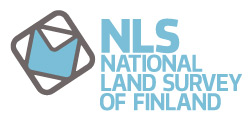


                    Pääohjelma eri testimittausmenetelmien syöttämistä varten / 
                    The Main Program for Inputting Different Testing Methods
                   
                    Author: Tuukka Mattila
                    Do not hesitate to contact via LinkedIn:
                    https://www.linkedin.com/in/tuukkamattila/
                    
                    Thank you for the help: Topi Rikkinen, Marko Ollikainen, Antti Laaksonen, 
                    Hannu Koivula, and Ari Huvinen

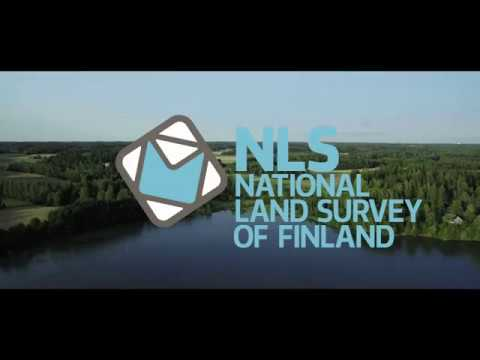

In [1]:
from IPython.display import Markdown, display, YouTubeVideo, HTML
# display(Markdown('**Ohjeistuksia testimittausten analysointia varten / Guidance for Analyzing Test Measurements**'))
# https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html

# Use this, when no firewall problems:
display(YouTubeVideo('urj7mGjKY9Q', width=980, height=551.25, autoplay = 1, start = 53, loop = 1, playlist='urj7mGjKY9Q'))
# https://developers.google.com/youtube/player_parameters#Parameters

# Use this, when firewall problems:
# HTML('<iframe width="980" height="551.25" src="https://www.youtube.com/embed/urj7mGjKY9Q" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Laitetaan kello päälle ohjelman ajan mittaamiseksi. / Let's start the clock for the program to measure the time spent:

In [2]:
import time
time_beginning = time.time()

Tuodaan tarvittavat kirjastot / Import necessary Python libraries:

In [3]:
from IPython.display import Markdown, display, YouTubeVideo, HTML
import os
import sys
import glob
import pathlib
import pandas as pd
from PyPDF2 import PdfFileMerger

Määritetään funktio, joka ajaa NLS GNSS SOFAMESA -ohjelman. / Let's define a function, which runs the NLS GNSS SOFAMESA software:

In [4]:
def run_NLS_GNSS_SOFAMESA(name_of_GNSS_device_or_NRTK_method):
    %run NLS_GNSS_SOFAMESA.ipynb
    return table1_df, table2_df, testmeasurements_df_name, filename_path

Syötetään mittaustiedostoja ohjelmaan / Let's input the test measurement files:

Kysytään projektikansion nimi / Let's ask the name of the project folder:

In [5]:
name_of_the_project_folder = str(input("Enter the name of the project folder: "))
try:
    os.makedirs('{0}{2}{1}'.format(pathlib.Path.cwd(), name_of_the_project_folder, os.sep))
    project_folder_path = '{0}{2}{1}'.format(pathlib.Path.cwd(), name_of_the_project_folder, os.sep)
except:
    print('Folder already exists. Use the existing project folder location {0}{2}{1}.'.format(pathlib.Path.cwd(), name_of_the_project_folder, os.sep))
    project_folder_path = '{0}{2}{1}'.format(pathlib.Path.cwd(), name_of_the_project_folder, os.sep)

Enter the name of the project folder: Project Name Folder


Kysytään referenssipisteen, jolla on mitattu, nimi kansion nimeksi / Let's ask the name of the reference point, on which the measurements have been made, as the folder name:

In [6]:
name_of_the_reference_point_folder = str(input("Enter the name of the reference point, on which the measurements have been made, as the folder name: "))
try:
    os.makedirs('{0}{3}{1}{3}{2}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, os.sep))
    reference_point_folder_path = '{0}{3}{1}{3}{2}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, os.sep)
except:
    print('Folder already exists. Use the existing folder location of the reference point {0}{3}{1}{3}{2}.'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, os.sep))
    reference_point_folder_path = '{0}{3}{1}{3}{2}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, os.sep)

Enter the name of the reference point, on which the measurements have been made, as the folder name: 99M5040


Kysytään kaikkien pisteiden referenssikoordinaattien .csv-tiedostoa muodossa [Reference Point Number,Northing,Easting,Elevation] / Let's ask a .csv file of the reference coordinates of all of the reference points, formatted as [Reference Point Number,Northing,Easting,Elevation]:

In [7]:
referencecoordinates_df = pd.read_csv(input("Enter the name of the reference points file (.csv). The data has to be formatted as (Reference Point Number,Northing,Easting,Elevation) and the file has to be located in the same folder as this Jupyter Notebook file: "), delimiter=',')
# referencecoordinates_df = pd.read_csv('reference_points_example.csv', sep = ',')
referencepoint_number = name_of_the_reference_point_folder

while referencepoint_number != name_of_the_reference_point_folder or referencecoordinates_df.loc[referencecoordinates_df['Reference Point Number'] == referencepoint_number].empty is True:
    print("That's not a valid Reference Point Number in your .csv file or some data doesn't meet the requirements! Try again!")
    referencecoordinates_df = pd.read_csv(input("Enter the name of the reference points file (.csv). The data has to be formatted as (Reference Point Number,Northing,Easting,Elevation) and the file has to be located in the same folder as this Jupyter Notebook file: "), delimiter=',')

Enter the name of the reference points file (.csv). The data has to be formatted as (Reference Point Number,Northing,Easting,Elevation) and the file has to be located in the same folder as this Jupyter Notebook file: reference_points_example.csv


Kysytään mittauskerta referenssipisteellä, jolla on mitattu, kansion nimeksi / Let's ask the number of visit to the reference point, on which the measurements have been made, as the folder name:

In [8]:
number_of_visit_at_the_reference_point = str(input("Enter the number of visit to the reference point, on which the measurements have been made, as the folder name : "))
try:
    os.makedirs('{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, number_of_visit_at_the_reference_point, os.sep))
    number_of_visit_at_the_reference_point_folder_path = '{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, number_of_visit_at_the_reference_point, os.sep)
except:
    print('Folder already exists. Use the existing folder location of the number of visit to the reference point {0}{4}{1}{4}{2}{4}{3}.'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, number_of_visit_at_the_reference_point, os.sep))
    number_of_visit_at_the_reference_point_folder_path = '{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, number_of_visit_at_the_reference_point, os.sep)

Enter the number of visit to the reference point, on which the measurements have been made, as the folder name : 4


Kysytään ladattavien tiedostojen lukumäärä / Let's ask the number of files to be uploaded:

In [9]:
number_of_files = int(input("Enter the number of files to be uploaded: "))

Enter the number of files to be uploaded: 4


Kysytään toleranssiarvot outlier-havaintojen poistamiseksi / Let's ask the tolerance values, for outlier removal:

In [10]:
tolerance_north_east = float(input('Enter a single tolerance value (m) for both North and East, which will be used to remove outliers from the measurements (for example 0.1; THE VALUE HAS TO BE POSITIVE: '))
tolerance_height = float(input('Enter a single tolerance value (m) for Height, which will be used to remove outliers from the measurements (for example 0.2; THE VALUE HAS TO BE POSITIVE: '))
# tolerance_north_east = 0.1
# tolerance_height = 0.2

Enter a single tolerance value (m) for both North and East, which will be used to remove outliers from the measurements (for example 0.1; THE VALUE HAS TO BE POSITIVE: 0.1
Enter a single tolerance value (m) for Height, which will be used to remove outliers from the measurements (for example 0.2; THE VALUE HAS TO BE POSITIVE: 0.2


Testataan, miten hyvin yllä oleva aineisto asettuu normaalijakauman mukaiseksi. Tuotetaan yllä olevan aineiston keskiarvojen ja -hajontojen avulla malli normaalijakaumalle. Hyödynnetään satunnaisen numeron tuottamista mallin luomiseksi ja lasketaan normaalijakaumat. Voit testata eri otoskoolla mallia. (KESKEN) / Let's test, how well the data above can be fitted to follow the Gaussian distribution. We can produce a Gaussian distribution model with the help of the means and standard deviations of the test measurements. Let's utilize random number generation to produce the model and calculate distributions. You can test the model with varying sample sizes (IN PROGRESS):

In [11]:
size = int(input('Enter the sample size (for example 10, 100, 1000 or 10000; THE VALUES HAS TO BE BETWEEN 1-20000 AND AN INTEGER): '))
# size = 10000

while int(size) < 1 or int(size) > 20000 or int(size) is None:
    print("Those aren't valid numbers! Try again")
    size = int(input('Enter the sample size (for example 10, 100, 1000 or 10000; THE VALUES HAS TO BE BETWEEN 1-20000 AND AN INTEGER): '))

Enter the sample size (for example 10, 100, 1000 or 10000; THE VALUES HAS TO BE BETWEEN 1-20000 AND AN INTEGER): 10000


Kysytään GNSS-laitteen tai verkko-RTK-menetelmän, jolla on mitattu, nimeä kansion nimeksi / Let's ask the name of the GNSS device or Network-RTK method, which have been utilized, as the folder name:

In [12]:
i = 0
testmeasurements_name_list = []
filepaths = []
filepaths_method_figures = []
while i < number_of_files:
    name_of_GNSS_device_or_NRTK_method = str(input("Enter the folder name of the GNSS device or Network-RTK method\n(GNSS device: Trimble R10 = R10, Leica GS15 = LGS15, Topcon HiPer HR = THR, … ; Network-RTK methods: VIRTUAL REFERENCE STATION = VRS, MASTER-AUXILIARY CONCEPT = MAC, …): "))
    testmeasurements_name_list.append(name_of_GNSS_device_or_NRTK_method)
    try:
        os.makedirs('{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, name_of_GNSS_device_or_NRTK_method, os.sep))
        GNSS_device_or_NRTK_method_folder_path = '{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, name_of_GNSS_device_or_NRTK_method, os.sep)
    except:
        print('Folder already exists. Use the existing folder location of the GNSS device or Network-RTK method {0}{4}{1}{4}{2}{4}{3}.'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, name_of_GNSS_device_or_NRTK_method, os.sep))
        GNSS_device_or_NRTK_method_folder_path = '{0}{4}{1}{4}{2}{4}{3}'.format(pathlib.Path.cwd(), name_of_the_project_folder, name_of_the_reference_point_folder, name_of_GNSS_device_or_NRTK_method, os.sep)
    table1_df, table2_df, testmeasurements_df_name, filename_path = run_NLS_GNSS_SOFAMESA(name_of_GNSS_device_or_NRTK_method)
    testmeasurements_df_name = testmeasurements_df_name.split('.')[0]
    table1_df.name = str(name_of_GNSS_device_or_NRTK_method)
    table2_df.name = str(name_of_GNSS_device_or_NRTK_method)
    filepaths.append(filename_path)
    filepaths_method_figures.append(session_folder_path)
    exec("table1_df.to_csv(os.path.join(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df_name, r'{}_table1.csv'))".format(testmeasurements_df_name))
    exec("table2_df.to_csv(os.path.join(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df_name, r'{}_table2.csv'))".format(testmeasurements_df_name))
    i += 1

Enter the folder name of the GNSS device or Network-RTK method
(GNSS device: Trimble R10 = R10, Leica GS15 = LGS15, Topcon HiPer HR = THR, … ; Network-RTK methods: VIRTUAL REFERENCE STATION = VRS, MASTER-AUXILIARY CONCEPT = MAC, …): METHOD1
Enter the name of the testmeasurements file (.csv). The data has to be formatted as (Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS) and the file has to be located in the same folder as this Jupyter Notebook file: 20190524-A-99M5040-METHOD1-4.csv


<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

C:\Users\TMATTILA\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 3 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

C:\Omat\Jupyter_Notebook\Versions\NLS_GNSS_SOFAMESA_v1.1\Project Name Folder\99M5040\METHOD1\20190524-A-99M5040-METHOD1-4\20190524-A-99M5040-METHOD1-4_Measurement_Report.pdf created


**This program took 116.38s to finish!**

Enter the folder name of the GNSS device or Network-RTK method
(GNSS device: Trimble R10 = R10, Leica GS15 = LGS15, Topcon HiPer HR = THR, … ; Network-RTK methods: VIRTUAL REFERENCE STATION = VRS, MASTER-AUXILIARY CONCEPT = MAC, …): METHOD2
Enter the name of the testmeasurements file (.csv). The data has to be formatted as (Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS) and the file has to be located in the same folder as this Jupyter Notebook file: 20190524-A-99M5040-METHOD2-4.csv


<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 3 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

C:\Omat\Jupyter_Notebook\Versions\NLS_GNSS_SOFAMESA_v1.1\Project Name Folder\99M5040\METHOD2\20190524-A-99M5040-METHOD2-4\20190524-A-99M5040-METHOD2-4_Measurement_Report.pdf created


**This program took 114.75s to finish!**

Enter the folder name of the GNSS device or Network-RTK method
(GNSS device: Trimble R10 = R10, Leica GS15 = LGS15, Topcon HiPer HR = THR, … ; Network-RTK methods: VIRTUAL REFERENCE STATION = VRS, MASTER-AUXILIARY CONCEPT = MAC, …): METHOD3
Enter the name of the testmeasurements file (.csv). The data has to be formatted as (Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS) and the file has to be located in the same folder as this Jupyter Notebook file: 20190524-A-99M5040-METHOD3-4.csv


<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 3 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

C:\Omat\Jupyter_Notebook\Versions\NLS_GNSS_SOFAMESA_v1.1\Project Name Folder\99M5040\METHOD3\20190524-A-99M5040-METHOD3-4\20190524-A-99M5040-METHOD3-4_Measurement_Report.pdf created


**This program took 110.08s to finish!**

Enter the folder name of the GNSS device or Network-RTK method
(GNSS device: Trimble R10 = R10, Leica GS15 = LGS15, Topcon HiPer HR = THR, … ; Network-RTK methods: VIRTUAL REFERENCE STATION = VRS, MASTER-AUXILIARY CONCEPT = MAC, …): METHOD4
Enter the name of the testmeasurements file (.csv). The data has to be formatted as (Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS) and the file has to be located in the same folder as this Jupyter Notebook file: 20190524-A-99M5040-METHOD4-4.csv


<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 3 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 1 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

<Figure size 1500x1200 with 2 Axes>

C:\Omat\Jupyter_Notebook\Versions\NLS_GNSS_SOFAMESA_v1.1\Project Name Folder\99M5040\METHOD4\20190524-A-99M5040-METHOD4-4\20190524-A-99M5040-METHOD4-4_Measurement_Report.pdf created


**This program took 113.4s to finish!**

Yhdistetään pdf-tiedostot yhdeksi pdf-tiedostoksi: / Let's merge multiple pdf files together:

In [13]:
import re
from reportlab.lib import colors
from reportlab.lib.styles import ParagraphStyle as PS
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, PageBreak, Table, TableStyle
from reportlab.platypus.doctemplate import PageTemplate, BaseDocTemplate
from reportlab.platypus.doctemplate import Frame
from reportlab.platypus.tableofcontents import TableOfContents
from reportlab.lib.pagesizes import A1, A2, A3, A4, landscape, portrait
from reportlab.lib.units import cm
import string
import datetime

# ------------------------------------------------------------------------------------------
class MyDocTemplate(BaseDocTemplate):
    
    def __init__(self, filename, **kw):
        self.allowSplitting = 0
        BaseDocTemplate.__init__(self, filename, **kw)
        template = PageTemplate('normal', [Frame(2.5*cm, 2.5*cm, 37*cm, 25*cm, id='F1')], pagesize = landscape(A3))
        self.addPageTemplates(template)

    def afterFlowable(self, flowable):
        "Registers TOC entries."
        if flowable.__class__.__name__ == 'Paragraph':
            text = flowable.getPlainText()
            style = flowable.style.name
            if style == 'Heading1':
                self.notify('TOCEntry', (0, text, self.page))
            if style == 'Heading2':
                self.notify('TOCEntry', (1, text, self.page))

h_title = PS(name = 'h_title', fontSize = 36, leading = 18)
h0 = PS(name = 'Heading0', fontSize = 14, leading = 16)
h1 = PS(name = 'Heading1', fontSize = 14, leading = 16)
h2 = PS(name = 'Heading2', fontSize = 12, leading = 14, leftIndent = 1*cm)
h3 = PS(name = 'Heading3', fontSize = 12, leading = 14, leftIndent = 1*cm)
# ------------------------------------------------------------------------------------------
def create_pdf(fname, fpaths_method_figures, figures_df, front_cover, back_cover, number_of_visit_at_the_reference_point, number_of_visit_at_the_reference_point_folder_path, encrypt_pswd):
    filename = '{0}{3}{1}{2}'.format(number_of_visit_at_the_reference_point_folder_path, fname, '.pdf', os.sep)
    doc = SimpleDocTemplate(filename, rightMargin = 0, leftMargin= 0, topMargin = 0, bottomMargin= 0)
    Story = []
    toc = TableOfContents()
    width = 12.5*cm
    height = 6*cm    
    toc.levelStyles = [h1, h2]
    Story.append(Paragraph('This PDF document was produced:', PS('body')))
    now1 = str(datetime.datetime.now())
    now2 = str(datetime.date.today())
    Story.append(Paragraph(now1, PS('body')))
    Story.append(Paragraph('<br/><br/><br/><br/><br/><br/><br/>NLS GNSS SOFAMESA<br/><br/>', h_title))
    Story.append(Paragraph('GNSS Measurement Accuracy Analysis Software of the National Land Survey of Finland<br/>Beta Version 1.10<br/>{}<br/><br/><br/><br/><br/><br/><br/>'.format(now2), PS('body')))
    Story.append(Paragraph('Combination of the <br/><br/>Measurement Reports<br/>', h_title))
    Story.append(Paragraph('<br/><br/>Reference point: {0}<br/>Number of visit: {1}<br/><br/><br/><br/><br/>'.format(name_of_the_reference_point_folder, number_of_visit_at_the_reference_point), PS('body')))
    fc_image = Image(front_cover, width, height)
    fc_image.hAlign = 'LEFT'
    Story.append(fc_image)
    credits = ('\nAuthor: Tuukka Mattila.\nDo not hesitate to contact via LinkedIn: https://www.linkedin.com/in/tuukkamattila/.\n\nThank you for the help: Topi Rikkinen, Marko Ollikainen, Antti Laaksonen, Hannu Koivula, and Ari Huvinen.').replace('\n','<br />\n')
    Story.append(Paragraph(credits, PS('body')))
    Story.append(PageBreak())
    Story.append(toc)
    Story.append(PageBreak())
    Story.append(Paragraph('Combination of the Measurement Reports <br/><br/>', h1))
    Story.append(Paragraph('Please find the combined measurement results, which NLS GNSS SOFAMESA produces, on the upcoming pages.', PS('body')))
    Story.append(PageBreak())
    method_name_number = 0
    index = 0
    while index < len(figures_df.index):
        fig_title = figures_df.loc[index, 'The Figure File Name'].split('.')[0]
        fig_title = fig_title.split('_')[1]
        Story.append(Paragraph('{}'.format(fig_title), h2))
        Story.append(Paragraph('<br/><br/>', PS('body')))
        tbl_figs1 = [[None]] * 1
        tbl_figs2 = [[None]] * 1
        while method_name_number < len(testmeasurements_name_list):
            row = figures_df.loc[index, 'The Figure File Name']
            width1 = 13.33*cm
            height1 = 10*cm
            while method_name_number < len(testmeasurements_name_list):
                def image_creation(fpaths_method_figures, method_name_number, row, width1, height1):
                    im = Image(pathlib.Path(fpaths_method_figures[method_name_number]).joinpath(row), width1, height1)
                    im.hAlign = 'LEFT'
                    return im
                if method_name_number < 3:
                        im = image_creation(fpaths_method_figures, method_name_number, row, width1, height1)
                        tbl_figs1[0].append([[im]])
                else:
                    im = image_creation(fpaths_method_figures, method_name_number, row, width1, height1)
                    tbl_figs2[0].append([[im]])
                break
            method_name_number += 1
        tbl_figs1 = Table(tbl_figs1)
        Story.append(tbl_figs1)
        tbl_figs2 = Table(tbl_figs2)
        Story.append(tbl_figs2)
        Story.append(PageBreak())
        method_name_number = 0
        index += 1
    Story.append(Paragraph('Conclusions', h1))
    Story.append(PageBreak())
    Story.append(Paragraph('This PDF document was produced:', PS('body')))
    now1 = str(datetime.datetime.now())
    Story.append(Paragraph(now1, PS('body')))
    Story.append(Paragraph('<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>NLS GNSS SOFAMESA<br/><br/>', h_title))
    Story.append(Paragraph('GNSS Measurement Accuracy Analysis Software of the National Land Survey of Finland<br/>Beta Version 1.10<br/>{}<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>'.format(now2), PS('body')))
    bc_image = Image(back_cover, width, height)
    bc_image.hAlign = 'LEFT'
    Story.append(bc_image)
    Story.append(Paragraph(credits, PS('body')))
    
    doc = MyDocTemplate(filename,
                        title = 'The number of visit: {} analyzed by NLS GNSS SOFAMESA: GNSS Measurement Accuracy Analysis Software of the National Land Survey of Finland'.format(number_of_visit_at_the_reference_point),
                        author = 'Tuukka Mattila. Do not hesitate to contact via LinkedIn: https://www.linkedin.com/in/tuukkamattila/',
                        encrypt = encrypt_pswd)
    doc.multiBuild(Story)
        
    print("{} created".format(filename))
    return filename

#----------------------------------------------------------------------
if __name__ == "__main__":
    path_pdf_accessories = pathlib.Path(pathlib.Path(pathlib.Path.cwd()).joinpath("for_the_pdf_report"))
    front_cover = os.path.join(path_pdf_accessories, "NLS_logo1.jpg")
    back_cover = os.path.join(path_pdf_accessories, "NLS_logo2.jpg")
    filename = '{0}_{1}_Combined_Measurement_Report'.format(name_of_the_reference_point_folder, number_of_visit_at_the_reference_point)
    encrypt_pswd = None
# encrypt_doc = input("Do you want to set up a password for the combination of the measurement reports .pdf file? Enter 'yes' or 'no': ")
# if encrypt_doc == 'yes':
#  encrypt_pswd = input("Enter a password for the combination of the measurement reports .pdf file: ")
#  filename_path = create_pdf(filename, front_cover, back_cover, number_of_visit_at_the_reference_point, number_of_visit_at_the_reference_point_folder_path, encrypt_pswd)
# elif encrypt_doc == 'no':
#  encrypt_pswd = None
#  filename_path = create_pdf(filename, front_cover, back_cover, number_of_visit_at_the_reference_point, number_of_visit_at_the_reference_point_folder_path, encrypt_pswd)
    filename_path = create_pdf(filename, filepaths_method_figures, figures_df, front_cover, back_cover, number_of_visit_at_the_reference_point, number_of_visit_at_the_reference_point_folder_path, encrypt_pswd)
#----------------------------------------------------------------------        
# def merger1(output_path, input_paths):
    # pdf_merger = PdfFileMerger()
    # file_handles = []
    
    # for path in input_paths:
        # pdf_merger.merge(position = 1, fileobj = path, pages = (6, 7))
        
    # with open(output_path, 'wb') as fileobj:
        # pdf_merger.write(fileobj)
    
    # output_path = [output_path]
    # return output_path

# output_filepaths = merger1('{0}{3}{1}_{2}_Combined_Measurement_Report_plain.pdf'.format(number_of_visit_at_the_reference_point_folder_path, name_of_the_reference_point_folder, number_of_visit_at_the_reference_point, os.sep), filepaths)
# output_filepaths.insert(0, filename_path)

# def merger2(output_path, input_paths):
    # pdf_merger = PdfFileMerger()
    # file_handles = []
    
    # for path in input_paths:
        # pdf_merger.merge(position = 3, fileobj = path)
        
    # with open(output_path, 'wb') as fileobj:
        # pdf_merger.write(fileobj)
    
    # output_path = [output_path]
    # return output_path

# output_filepaths_combined = merger2('{0}{3}{1}_{2}_Combined_Measurement_Report.pdf'.format(number_of_visit_at_the_reference_point_folder_path, name_of_the_reference_point_folder, number_of_visit_at_the_reference_point, os.sep), output_filepaths)


C:\Omat\Jupyter_Notebook\Versions\NLS_GNSS_SOFAMESA_v1.1\Project Name Folder\99M5040\4\99M5040_4_Combined_Measurement_Report.pdf created


In [14]:
time_ending = time.time()
display(Markdown('**This program took {}s to finish!**'.format(round(time_ending-time_beginning, 2))))

**This program took 131.42s to finish!**

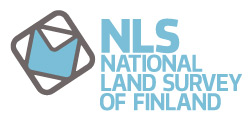
                  
                   
                    Author: Tuukka Mattila
                    Do not hesitate to contact via LinkedIn:
                    https://www.linkedin.com/in/tuukkamattila/
                    
                    Thank you for the help: Topi Rikkinen, Marko Ollikainen, Antti Laaksonen, 
                    Hannu Koivula, and Ari Huvinen